In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('dreaddit_StressAnalysis.csv')
print(df)

        id      subreddit post_id sentence_range  \
0      896  relationships  7nu7as       [50, 55]   
1    19059        anxiety  680i6d        (5, 10)   
2     7977           ptsd  8eeu1t        (5, 10)   
3     1214           ptsd  8d28vu         [2, 7]   
4     1965  relationships  7r1e85       [23, 28]   
..     ...            ...     ...            ...   
710  24271           ptsd  7vavh4         (0, 5)   
711   2212  relationships  7oeyuc       [70, 75]   
712  27951  relationships  7ssxec       (35, 40)   
713   1164     assistance  90bila        [8, 13]   
714   1519     assistance  7uueuc        [5, 10]   

                                                  text  label  confidence  \
0    Its like that, if you want or not.“ ME: I have...      0    0.800000   
1    I man the front desk and my title is HR Custom...      0    1.000000   
2    We'd be saving so much money with this new hou...      1    1.000000   
3    My ex used to shoot back with "Do you want me ...      1    0.

In [3]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


In [4]:
copy=df.copy()

In [5]:
df.dtypes

,0
id,int64
subreddit,object
post_id,object
sentence_range,object
text,object
...,...
lex_dal_avg_pleasantness,float64
social_upvote_ratio,float64
social_num_comments,int64
syntax_fk_grade,float64


In [6]:
copy=copy.drop(['subreddit','post_id','sentence_range','text'],axis=1)

In [7]:
copy=copy.dropna()

In [8]:
for col in copy:
  Q1=copy[col].quantile(0.25)
  Q3=copy[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  total_outliers=((copy[col]<lower_bound)|(copy[col]>upper_bound)).sum()
  print(f"{col}:{total_outliers} outliers")
  copy[col]=copy[col].clip(lower=lower_bound,upper=upper_bound)

id:0 outliers
label:0 outliers
confidence:0 outliers
social_timestamp:0 outliers
social_karma:88 outliers
syntax_ari:9 outliers
lex_liwc_WC:22 outliers
lex_liwc_Analytic:0 outliers
lex_liwc_Clout:0 outliers
lex_liwc_Authentic:0 outliers
lex_liwc_Tone:0 outliers
lex_liwc_WPS:27 outliers
lex_liwc_Sixltr:10 outliers
lex_liwc_Dic:21 outliers
lex_liwc_function:13 outliers
lex_liwc_pronoun:8 outliers
lex_liwc_ppron:10 outliers
lex_liwc_i:3 outliers
lex_liwc_we:73 outliers
lex_liwc_you:174 outliers
lex_liwc_shehe:14 outliers
lex_liwc_they:65 outliers
lex_liwc_ipron:13 outliers
lex_liwc_article:8 outliers
lex_liwc_prep:10 outliers
lex_liwc_auxverb:14 outliers
lex_liwc_adverb:3 outliers
lex_liwc_conj:16 outliers
lex_liwc_negate:13 outliers
lex_liwc_verb:7 outliers
lex_liwc_adj:9 outliers
lex_liwc_compare:18 outliers
lex_liwc_interrog:12 outliers
lex_liwc_number:29 outliers
lex_liwc_quant:11 outliers
lex_liwc_affect:12 outliers
lex_liwc_posemo:23 outliers
lex_liwc_negemo:17 outliers
lex_liwc_anx

In [9]:
corr_matrix=copy.corr()

In [10]:
corr_matrix

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
id,1.000000,0.006438,0.293395,-0.044689,0.060590,0.106073,0.066167,0.041138,-0.026612,0.041908,...,-0.057921,-0.070419,NaN,-0.067730,0.012248,-0.018700,0.007301,0.110427,0.104364,0.026615
label,0.006438,1.000000,0.127319,0.076184,-0.113937,-0.080983,0.096316,-0.178583,-0.348891,0.234268,...,-0.262622,0.016561,NaN,0.110158,-0.040773,-0.189999,0.130537,-0.049444,-0.047925,-0.331740
confidence,0.293395,0.127319,1.000000,-0.045449,0.029611,0.043075,0.011278,0.056748,-0.045826,0.042980,...,-0.020822,-0.021886,NaN,0.047297,-0.025629,-0.016487,-0.026234,-0.005298,0.042605,-0.043498
social_timestamp,-0.044689,0.076184,-0.045449,1.000000,0.009431,-0.045755,-0.043452,-0.011270,-0.087227,0.069944,...,-0.013478,0.002351,NaN,0.026044,-0.014469,-0.025320,0.004277,-0.029599,-0.050007,-0.066038
social_karma,0.060590,-0.113937,0.029611,0.009431,1.000000,0.008152,-0.102693,0.072574,0.060698,-0.061020,...,0.031045,-0.055371,NaN,-0.041415,0.038847,0.046111,0.286077,0.542719,0.002656,0.052653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lex_dal_avg_pleasantness,-0.018700,-0.189999,-0.016487,-0.025320,0.046111,-0.096044,-0.053309,-0.131770,-0.000782,-0.021618,...,0.265155,-0.004721,NaN,0.148259,-0.032918,1.000000,-0.053575,0.023845,-0.065283,0.330085
social_upvote_ratio,0.007301,0.130537,-0.026234,0.004277,0.286077,0.028091,-0.003382,-0.099297,-0.150457,0.124111,...,-0.028358,0.044568,NaN,0.041205,-0.049724,-0.053575,1.000000,-0.041696,0.028903,-0.090151
social_num_comments,0.110427,-0.049444,-0.005298,-0.029599,0.542719,-0.066527,-0.036602,0.003900,0.100430,-0.107496,...,0.024353,-0.093818,NaN,-0.069858,0.006255,0.023845,-0.041696,1.000000,-0.066465,-0.008276
syntax_fk_grade,0.104364,-0.047925,0.042605,-0.050007,0.002656,0.967610,0.609912,0.210397,0.056447,-0.004354,...,-0.205759,-0.139802,NaN,0.035682,-0.009935,-0.065283,0.028903,-0.066465,1.000000,0.061695


In [11]:
corr_matrix.to_csv('correlation_matrix')

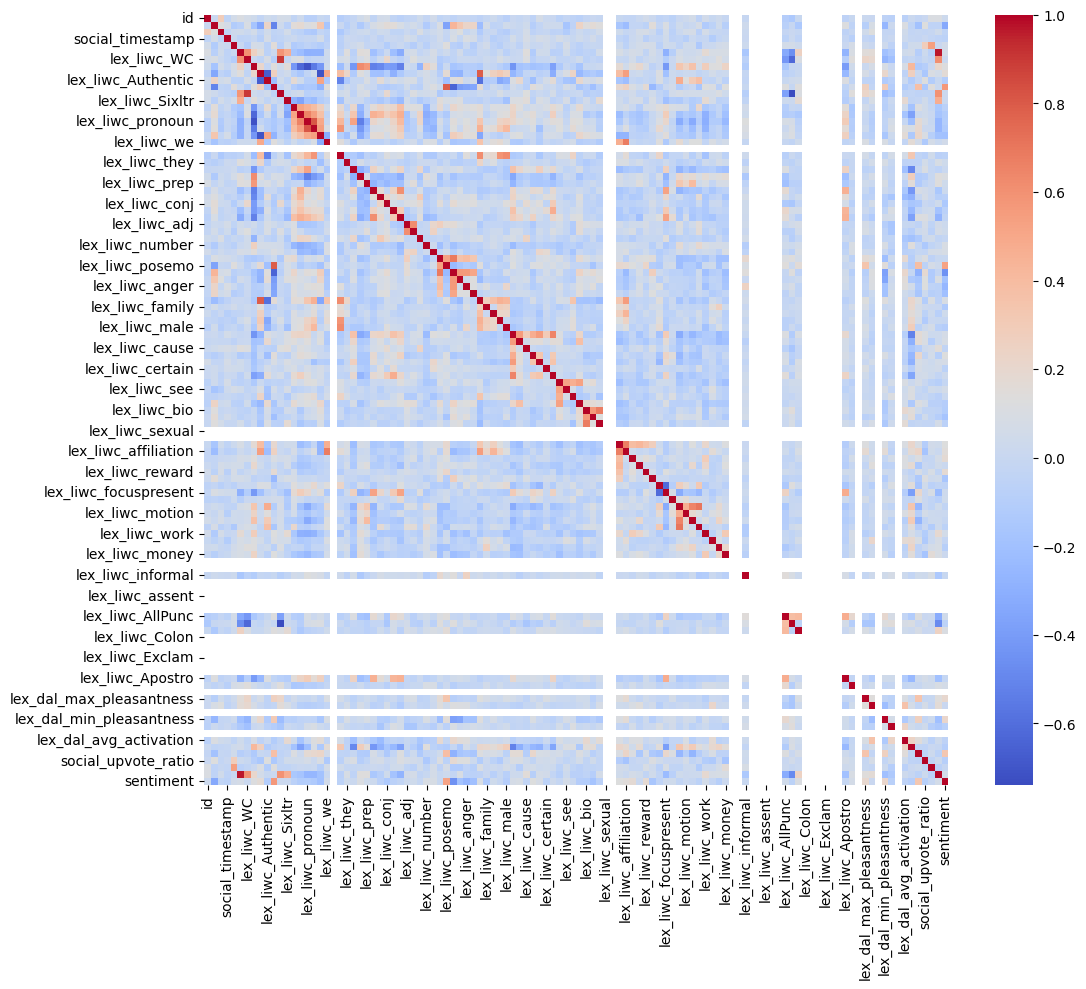

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(copy.corr(), cmap='coolwarm', annot=False)
plt.show()

In [13]:
corr_label=corr_matrix['label'].abs()
selected=corr_label[corr_label>=0.05].index.tolist()
df1=copy
final=copy[selected+['label']]
print(final.shape)

(715, 63)


In [14]:
print(final)

     label  confidence  social_timestamp  social_karma  syntax_ari  \
0        0    0.800000        1514980773            22   -1.238793   
1        0    1.000000        1493348050             5    7.684583   
2        1    1.000000        1524516630            10    2.360408   
3        1    0.500000        1524018289             5    5.997000   
4        0    0.800000        1516200171            22    4.649418   
..     ...         ...               ...           ...         ...   
710      1    1.000000        1517790160             7    4.597368   
711      1    0.571429        1515192055             0    1.452083   
712      1    0.600000        1516848555             3    3.956447   
713      0    0.600000        1532048310            18    0.236814   
714      1    0.000000        1517604595             4    3.221250   

     lex_liwc_WC  lex_liwc_Analytic  lex_liwc_Clout  lex_liwc_Authentic  \
0           55.0               2.82           57.22               55.41   
1        

In [15]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
import re

cleaned_texts=[]
for text in df['text']:
    text=re.sub(r'http\S+', '', text)
    text=re.sub(r'\s+', ' ', text).strip()

    cleaned_texts.append(text)
df['text'] = cleaned_texts

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
X=df['text'].values
y=df['label'].values



In [20]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    df['text'], df1.drop(columns=['label']), df1['label'], test_size=0.2, random_state=42, stratify=df1['label']
)


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_num=sc.fit_transform(X_train_num)
X_test_num=sc.transform(X_test_num)

In [22]:
corpus=X_train_text.astype(str).tolist()

print(corpus)

['But I have been on about a dozen times, and have been hung up on nine. It is always the same issue, sadly. I get depressed, it is late, I cannot sleep or stop thinking about past trauma, and I would just like to talk to someone. But the bulk of them have hung up, some almost immediately, and some after longer. It is the longer ones that hurt more.', "Hey Redditors, I am looking for advice and suggestions about what I should do with my current living situation. I have lived in my current apartment for 2 years, and took up tenancy after I separated from my ex-husband. He kept our apartment. The apartment I'm living in is comfortable enough, it's mine.", "Plus she sent him pictures of her ultrasound. Now I'm just heart-broken because I was head over heels for this guy and I'm also disgusted by what he did to this girl. I don't know how to confront him about this or how to handle this situation properly. I am going to break up with him, but what do I do after I end it? Do I tell his fian

In [23]:
tokenized=[word_tokenize(sentence.lower()) for sentence in corpus]
print("tokenized corpus: ")
for i, tokens in enumerate(tokenized):
  print(f"Sentence {i+1}: {tokens}")

tokenized corpus: 
Sentence 1: ['but', 'i', 'have', 'been', 'on', 'about', 'a', 'dozen', 'times', ',', 'and', 'have', 'been', 'hung', 'up', 'on', 'nine', '.', 'it', 'is', 'always', 'the', 'same', 'issue', ',', 'sadly', '.', 'i', 'get', 'depressed', ',', 'it', 'is', 'late', ',', 'i', 'can', 'not', 'sleep', 'or', 'stop', 'thinking', 'about', 'past', 'trauma', ',', 'and', 'i', 'would', 'just', 'like', 'to', 'talk', 'to', 'someone', '.', 'but', 'the', 'bulk', 'of', 'them', 'have', 'hung', 'up', ',', 'some', 'almost', 'immediately', ',', 'and', 'some', 'after', 'longer', '.', 'it', 'is', 'the', 'longer', 'ones', 'that', 'hurt', 'more', '.']
Sentence 2: ['hey', 'redditors', ',', 'i', 'am', 'looking', 'for', 'advice', 'and', 'suggestions', 'about', 'what', 'i', 'should', 'do', 'with', 'my', 'current', 'living', 'situation', '.', 'i', 'have', 'lived', 'in', 'my', 'current', 'apartment', 'for', '2', 'years', ',', 'and', 'took', 'up', 'tenancy', 'after', 'i', 'separated', 'from', 'my', 'ex-husba

In [24]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

filtered_corpus=[[word for word in tokens if word.isalpha() and word not in stop_words] for tokens in tokenized]


In [25]:
print("after removing stop words: ")
for i, words in enumerate(filtered_corpus):
  print(f"Sentence{i+1}: {words}")

after removing stop words: 
Sentence1: ['dozen', 'times', 'hung', 'nine', 'always', 'issue', 'sadly', 'get', 'depressed', 'late', 'sleep', 'stop', 'thinking', 'past', 'trauma', 'would', 'like', 'talk', 'someone', 'bulk', 'hung', 'almost', 'immediately', 'longer', 'longer', 'ones', 'hurt']
Sentence2: ['hey', 'redditors', 'looking', 'advice', 'suggestions', 'current', 'living', 'situation', 'lived', 'current', 'apartment', 'years', 'took', 'tenancy', 'separated', 'kept', 'apartment', 'apartment', 'living', 'comfortable', 'enough', 'mine']
Sentence3: ['plus', 'sent', 'pictures', 'ultrasound', 'head', 'heels', 'guy', 'also', 'disgusted', 'girl', 'know', 'confront', 'handle', 'situation', 'properly', 'going', 'break', 'end', 'tell', 'fiancee']
Sentence4: ['hi', 'guys', 'current', 'english', 'major', 'first', 'year', 'uni', 'trying', 'save', 'enough', 'money', 'participate', 'language', 'study', 'hokkaido', 'japan', 'career', 'goal', 'always', 'teach', 'english', 'asia', 'years', 'deliberati

In [26]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemmatized_corpus=[[lemmatizer.lemmatize(word) for word in words] for words in filtered_corpus]
print("\nAfter Lemmatization:\n")
for i, words in enumerate(lemmatized_corpus):
    print(f"Sentence {i+1}: {words}")


After Lemmatization:

Sentence 1: ['dozen', 'time', 'hung', 'nine', 'always', 'issue', 'sadly', 'get', 'depressed', 'late', 'sleep', 'stop', 'thinking', 'past', 'trauma', 'would', 'like', 'talk', 'someone', 'bulk', 'hung', 'almost', 'immediately', 'longer', 'longer', 'one', 'hurt']
Sentence 2: ['hey', 'redditors', 'looking', 'advice', 'suggestion', 'current', 'living', 'situation', 'lived', 'current', 'apartment', 'year', 'took', 'tenancy', 'separated', 'kept', 'apartment', 'apartment', 'living', 'comfortable', 'enough', 'mine']
Sentence 3: ['plus', 'sent', 'picture', 'ultrasound', 'head', 'heel', 'guy', 'also', 'disgusted', 'girl', 'know', 'confront', 'handle', 'situation', 'properly', 'going', 'break', 'end', 'tell', 'fiancee']
Sentence 4: ['hi', 'guy', 'current', 'english', 'major', 'first', 'year', 'uni', 'trying', 'save', 'enough', 'money', 'participate', 'language', 'study', 'hokkaido', 'japan', 'career', 'goal', 'always', 'teach', 'english', 'asia', 'year', 'deliberation', 'com

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000,ngram_range=(1,3),max_df=0.9,min_df=0.005)


In [28]:
X_train_tfidf=tfidf.fit_transform(X_train_text)
X_test_tfidf=tfidf.transform(X_test_text)

In [29]:
from scipy.sparse import hstack, csr_matrix
X_train_combined=hstack([X_train_tfidf, csr_matrix(X_train_num)])
X_test_combined=hstack([X_test_tfidf, csr_matrix(X_test_num)])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [31]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svm=SVC(probability=True)
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()

voting_clf=VotingClassifier(
    estimators=[
        ('lr',lr),
        ('rf',rf),
        ('svm',svm),
        ('knn',knn),
        ('nb',nb),
        ('dt',dt)

    ], voting='soft'
)

In [32]:
X_train_combined = X_train_combined.toarray()
X_test_combined = X_test_combined.toarray()

In [33]:
voting_clf.fit(X_train_combined,y_train)
y_pred=voting_clf.predict(X_test_combined)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test, y_pred)  )

[[45 24]
 [16 58]]
0.7202797202797203
0.7435897435897436


In [35]:
import pickle

with open('model_components.pkl', 'wb') as f:
    pickle.dump({
        'voting_clf': voting_clf,
        'tfidf': tfidf,
         },f)